<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v8_CASH_CORRECTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection


SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "SUHEYLA_06.01.2024.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 39 # @param {type:"number"}
PURSE = 250000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [3]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2024-01-05
39 days before current date:  2023-11-27
0 days before current date:  2024-01-06


In [4]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=46af7092391b1ccd81279d2cb1af9e809ba6dfc3aef0b36a5bfce77a48aa7140
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=5d4573efce0a882c0e534037a81276916e45efcdeed45e1c5dc599358b1230cd
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [5]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist30.csv bist30 ShoppingList.csv SUHEYLA_06.01.2024.csv


In [6]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




File SUHEYLA_06.01.2024.csv is present
File Best_PF_For_bist30.csv is present


In [7]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
XU100.IS,XU100.IS,7628.73,2024/01/05,17:10 TRT,80.890140,7570.05,7628.73,7532.16,0,20231010,7000.00,0.00001,NaN,NaN,NaN,NaN,0.07,0.076287,8.981857
AKBNK.IS,AKBNK.IS,36.78,2024/01/05,17:09 TRT,0.480000,36.38,36.88,35.86,71031470,20231127,33.48,299.00000,0.0,NaN,NaN,NaN,10010.52,10997.220000,9.856631
THYAO.IS,THYAO.IS,239.20,2024/01/05,17:09 TRT,5.899994,233.80,239.20,233.20,31168225,20231126,257.00,65.50000,0.0,NaN,NaN,NaN,16833.50,15667.600000,-6.926070
PENTA.IS,PENTA.IS,19.63,2024/01/05,17:09 TRT,0.320000,19.30,20.00,19.15,3347146,20231127,22.76,894.00000,0.0,NaN,NaN,NaN,20347.44,17549.220000,-13.752197
EKGYO.IS,EKGYO.IS,7.64,2024/01/05,17:09 TRT,0.380000,7.25,7.64,7.23,238688261,20231126,7.50,3283.00000,0.0,NaN,NaN,NaN,24622.50,25082.120000,1.866667
TURSG.IS,TURSG.IS,45.16,2024/01/05,17:09 TRT,1.759998,43.42,45.44,42.40,7806787,20231128,38.94,2459.00000,0.0,NaN,NaN,NaN,95753.46,111048.440000,15.973292
SKBNK.IS,SKBNK.IS,4.21,2024/01/05,17:09 TRT,0.120000,4.09,4.22,4.09,113237468,20231128,7.20,13688.00000,0.0,NaN,NaN,NaN,98553.60,57626.480000,-41.527778
AKFGY.IS,AKFGY.IS,1.83,2024/01/05,17:09 TRT,-0.030000,1.87,1.89,1.81,112359180,20231126,3.00,16288.00000,0.0,NaN,NaN,NaN,48864.00,29807.040000,-39.000000
ECZYT.IS,ECZYT.IS,268.00,2024/01/05,17:09 TRT,8.250000,260.50,271.00,254.00,737059,20231126,339.00,324.00000,0.0,NaN,NaN,NaN,109836.00,86832.000000,-20.943953


In [8]:
if '$$CASH' in MYPF.columns:
  MYPF.drop([' $$CASH'], inplace=True)
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
XU100.IS,XU100.IS,7628.73,2024/01/05,17:10 TRT,80.890140,7570.05,7628.73,7532.16,0,20231010,7000.00,0.00001,NaN,NaN,NaN,NaN,0.07,0.076287,8.981857
AKBNK.IS,AKBNK.IS,36.78,2024/01/05,17:09 TRT,0.480000,36.38,36.88,35.86,71031470,20231127,33.48,299.00000,0.0,NaN,NaN,NaN,10010.52,10997.220000,9.856631
THYAO.IS,THYAO.IS,239.20,2024/01/05,17:09 TRT,5.899994,233.80,239.20,233.20,31168225,20231126,257.00,65.50000,0.0,NaN,NaN,NaN,16833.50,15667.600000,-6.926070
PENTA.IS,PENTA.IS,19.63,2024/01/05,17:09 TRT,0.320000,19.30,20.00,19.15,3347146,20231127,22.76,894.00000,0.0,NaN,NaN,NaN,20347.44,17549.220000,-13.752197
EKGYO.IS,EKGYO.IS,7.64,2024/01/05,17:09 TRT,0.380000,7.25,7.64,7.23,238688261,20231126,7.50,3283.00000,0.0,NaN,NaN,NaN,24622.50,25082.120000,1.866667
TURSG.IS,TURSG.IS,45.16,2024/01/05,17:09 TRT,1.759998,43.42,45.44,42.40,7806787,20231128,38.94,2459.00000,0.0,NaN,NaN,NaN,95753.46,111048.440000,15.973292
SKBNK.IS,SKBNK.IS,4.21,2024/01/05,17:09 TRT,0.120000,4.09,4.22,4.09,113237468,20231128,7.20,13688.00000,0.0,NaN,NaN,NaN,98553.60,57626.480000,-41.527778
AKFGY.IS,AKFGY.IS,1.83,2024/01/05,17:09 TRT,-0.030000,1.87,1.89,1.81,112359180,20231126,3.00,16288.00000,0.0,NaN,NaN,NaN,48864.00,29807.040000,-39.000000
ECZYT.IS,ECZYT.IS,268.00,2024/01/05,17:09 TRT,8.250000,260.50,271.00,254.00,737059,20231126,339.00,324.00000,0.0,NaN,NaN,NaN,109836.00,86832.000000,-20.943953


In [9]:
MYPF = MYPF[MYPF.index != '$$CASH']


In [10]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [11]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [12]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [13]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

657775.8562872999

In [14]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
MYPF



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ECZYT.IS,324.00000,339.00,109836.00,268.00,86832.000000,14.82276,13.20085,-20.943953,86832.0,324.0
SKBNK.IS,13688.00000,7.20,98553.60,4.21,57626.480000,13.30016,8.76081,-41.527778,57626.0,13687.0
TURSG.IS,2459.00000,38.94,95753.46,45.16,111048.440000,12.92227,16.88241,15.973292,111048.0,2458.0
ENKAI.IS,2227.00000,34.36,76519.72,33.28,74114.560000,10.32661,11.26745,-3.143190,74114.0,2226.0
ULKER.IS,756.00000,86.70,65545.20,79.75,60291.000000,8.84556,9.16589,-8.016148,60291.0,756.0
OTKAR.IS,150.00000,436.50,65475.00,440.50,66075.000000,8.83609,10.04522,0.916380,66075.0,150.0
BRSAN.IS,77.00000,710.00,54670.00,625.50,48163.500000,7.37791,7.32218,-11.901408,48163.0,76.0
AKFGY.IS,16288.00000,3.00,48864.00,1.83,29807.040000,6.59437,4.53149,-39.000000,29807.0,16287.0
TUPRS.IS,242.00000,157.20,38042.40,143.80,34799.600000,5.13396,5.29050,-8.524173,34799.0,241.0


In [15]:
# prompt: MYPF veri çerçevesi kullanılıyor:

MYPF.head()


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ECZYT.IS,324.0,339.00,109836.00,268.00,86832.00,14.82276,13.20085,-20.943953,86832.0,324.0
SKBNK.IS,13688.0,7.20,98553.60,4.21,57626.48,13.30016,8.76081,-41.527778,57626.0,13687.0
TURSG.IS,2459.0,38.94,95753.46,45.16,111048.44,12.92227,16.88241,15.973292,111048.0,2458.0
ENKAI.IS,2227.0,34.36,76519.72,33.28,74114.56,10.32661,11.26745,-3.143190,74114.0,2226.0
ULKER.IS,756.0,86.70,65545.20,79.75,60291.00,8.84556,9.16589,-8.016148,60291.0,756.0


In [16]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [17]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    print("Ordered Table: \n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio

In [18]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [19]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
TURSG.IS,2459.00000,38.94,95753.46,45.16,111048.440000,12.92227,16.88241,15.973292,111048.0,2458.0
ECZYT.IS,324.00000,339.00,109836.00,268.00,86832.000000,14.82276,13.20085,-20.943953,86832.0,324.0
ENKAI.IS,2227.00000,34.36,76519.72,33.28,74114.560000,10.32661,11.26745,-3.143190,74114.0,2226.0
OTKAR.IS,150.00000,436.50,65475.00,440.50,66075.000000,8.83609,10.04522,0.916380,66075.0,150.0
ULKER.IS,756.00000,86.70,65545.20,79.75,60291.000000,8.84556,9.16589,-8.016148,60291.0,756.0
SKBNK.IS,13688.00000,7.20,98553.60,4.21,57626.480000,13.30016,8.76081,-41.527778,57626.0,13687.0
BRSAN.IS,77.00000,710.00,54670.00,625.50,48163.500000,7.37791,7.32218,-11.901408,48163.0,76.0
TUPRS.IS,242.00000,157.20,38042.40,143.80,34799.600000,5.13396,5.29050,-8.524173,34799.0,241.0
AKFGY.IS,16288.00000,3.00,48864.00,1.83,29807.040000,6.59437,4.53149,-39.000000,29807.0,16287.0


In [20]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2023-11-27 00:00:00+03:00  41.80  42.00  40.68  41.96  3718968        0.0   
2023-11-28 00:00:00+03:00  42.10  42.40  39.90  40.60  5291610        0.0   
2023-11-29 00:00:00+03:00  40.60  40.60  38.00  38.34  5225972        0.0   
2023-11-30 00:00:00+03:00  38.30  38.78  36.50  38.12  9695783        0.0   
2023-12-01 00:00:00+03:00  38.32  39.40  36.78  

,TURSG.IS,ECZYT.IS,ENKAI.IS,OTKAR.IS,ULKER.IS,SKBNK.IS,BRSAN.IS,TUPRS.IS,AKFGY.IS,EKGYO.IS,CCOLA.IS,PENTA.IS,THYAO.IS,AKBNK.IS,XU100.IS,PF_Value,pct_change
Date,,,,,,,,,,,,,,,,,
2023-11-27 00:00:00+03:00,41.96,326.25,34.09,437.25,89.25,7.43,740.5,156.0,4.6800,7.60,415.25,22.64,260.50,34.30,8107.20,657775.856287,NaN
2023-11-28 00:00:00+03:00,40.60,342.00,35.18,437.25,88.70,7.22,722.0,156.0,4.7600,7.50,419.00,21.56,261.00,33.80,8093.50,656922.926287,-0.001297
2023-11-29 00:00:00+03:00,38.34,323.75,34.80,431.00,85.80,7.08,696.0,154.9,4.6500,7.40,414.75,21.28,255.00,33.92,8009.30,637571.156287,-0.029458
2023-11-30 00:00:00+03:00,38.12,333.50,34.64,441.75,85.65,7.00,673.5,152.9,4.5000,7.37,405.25,21.00,251.00,33.64,7948.60,636180.346287,-0.002181
2023-12-01 00:00:00+03:00,37.40,323.00,34.39,440.00,84.50,7.11,677.5,153.3,4.5300,7.35,422.25,21.40,260.75,34.86,8026.30,633309.946287,-0.004512
2023-12-04 00:00:00+03:00,36.68,305.25,34.35,457.50,84.00,6.99,673.5,154.1,4.4300,7.49,443.75,21.18,262.00,36.22,8087.20,629064.466287,-0.006704
2023-12-05 00:00:00+03:00,39.18,299.50,33.34,462.25,83.65,6.96,663.5,154.8,2.2009,7.38,447.00,21.34,259.00,36.56,8057.40,617354.088387,-0.018616
2023-12-06 00:00:00+03:00,38.46,287.00,31.96,461.25,81.25,7.00,649.5,149.9,2.0814,7.38,430.00,20.52,251.25,36.50,7855.10,602980.552887,-0.023282
2023-12-07 00:00:00+03:00,37.80,299.00,32.44,451.25,83.95,6.92,658.0,155.0,2.1163,7.66,428.75,20.70,259.75,35.88,7978.80,608390.240987,0.008972


In [21]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100

-0.4306559522141298

Showing Tearsheet of SUHEYLA_06.01.2024.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-11-28
End date,2024-01-05
Total months,1
,Backtest
Annual return,-68.2%
Cumulative returns,-12.0%
Annual volatility,34.5%
Sharpe ratio,-3.15
Calmar ratio,-3.82
Stability,0.71
Max drawdown,-17.8%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************



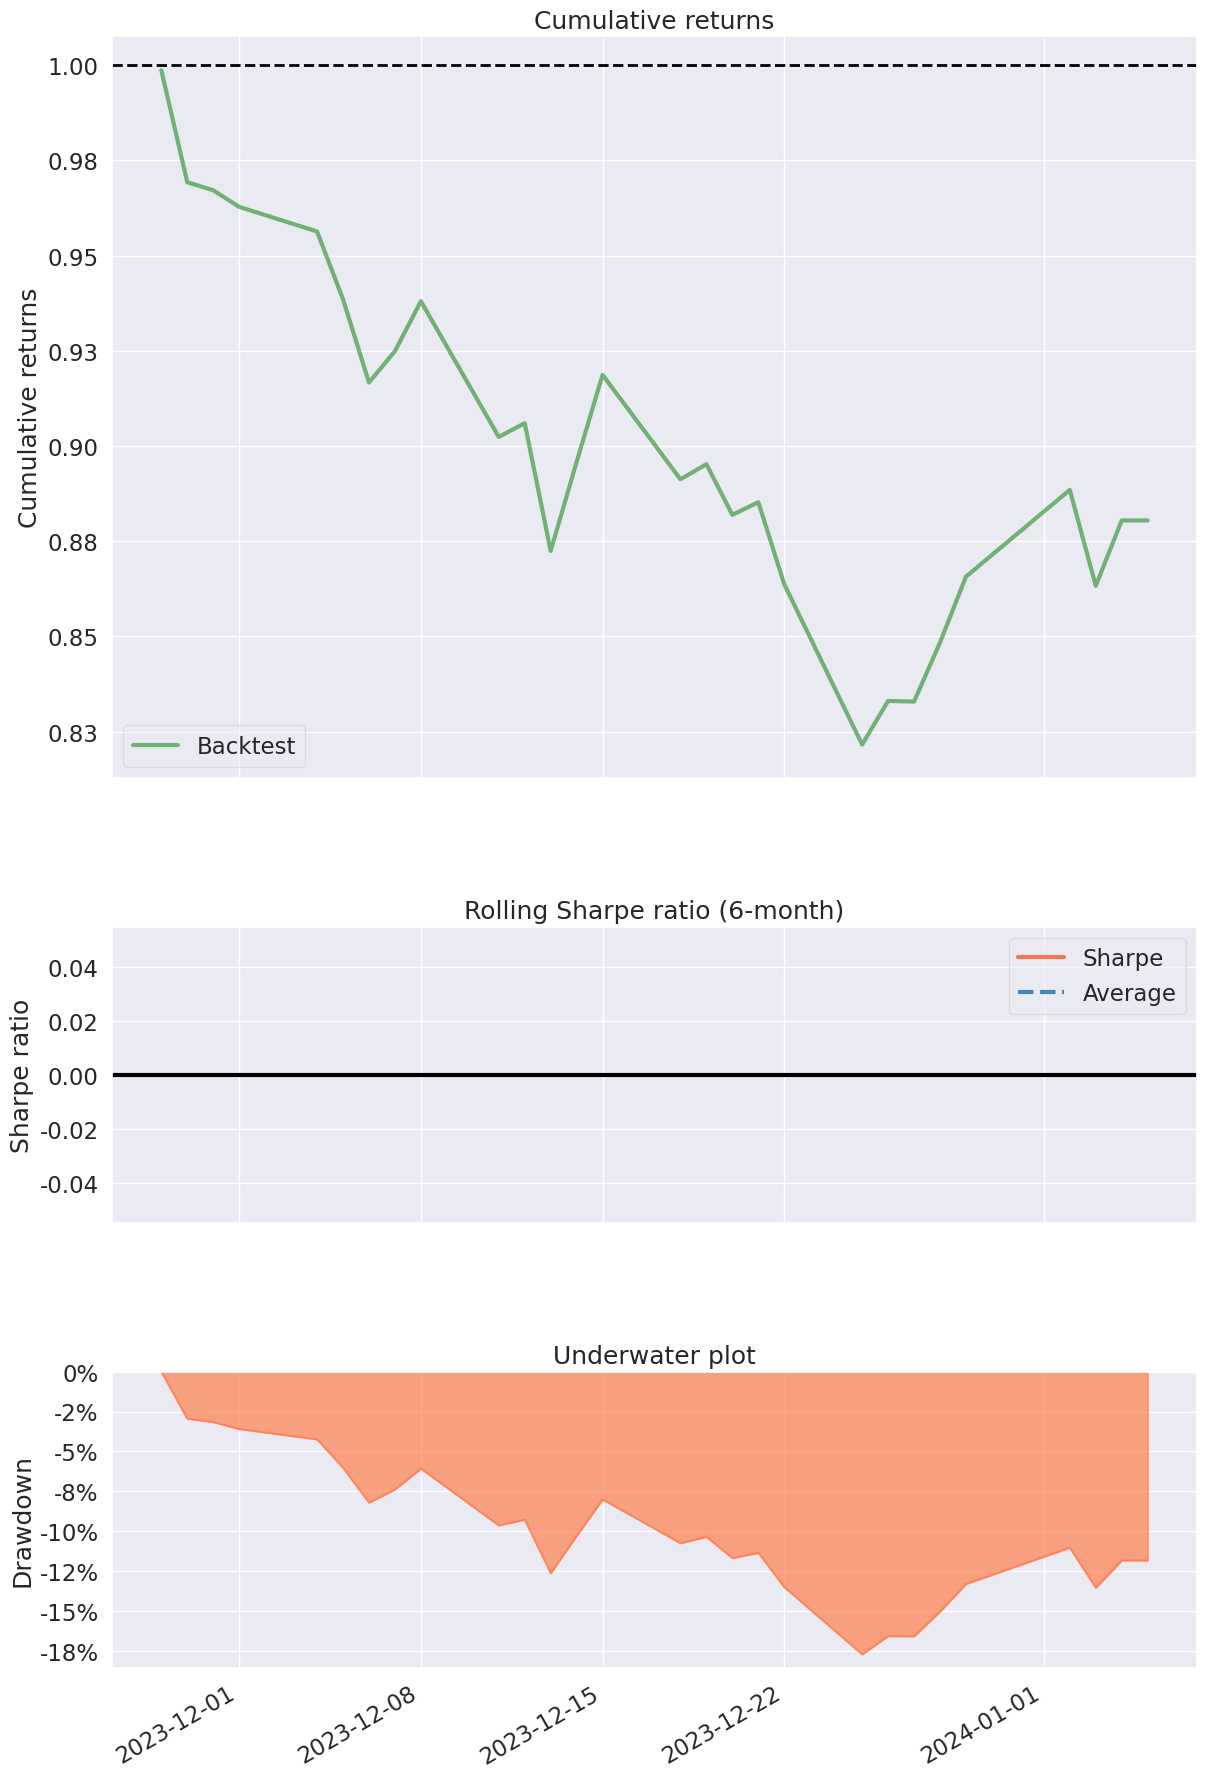

In [22]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [23]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-23-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-23-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-23-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical

Annual return         -0.682007
Cumulative returns    -0.119533
Annual volatility      0.344894
Sharpe ratio          -3.146629
Calmar ratio          -3.823504
Stability              0.705987
Max drawdown          -0.178372
Omega ratio            0.607635
Sortino ratio         -3.707226
Skew                  -0.305580
Kurtosis              -0.984250
Tail ratio             0.690983
Daily value at risk   -0.047759
dtype: float64

In [24]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
TURSG.IS,2459.00000,38.94,111026.16,45.16,119493.36,16.89,20.20,8.84,111048.0,2458.0,1.688241e-01,41.96,45.16,111048.416939,2646
ECZYT.IS,324.00000,339.00,86782.5,268.00,71288.00,13.20,12.05,-14.11,86832.0,324.0,1.320085e-01,326.25,268.0,86832.004125,266
ENKAI.IS,2227.00000,34.36,74111.66,33.28,72350.72,11.28,12.23,-2.30,74114.0,2226.0,1.126745e-01,34.09,33.28,74114.565719,2174
OTKAR.IS,150.00000,436.50,66024.75,440.50,66515.50,10.05,11.25,0.75,66075.0,150.0,1.004522e-01,437.25,440.5,66075.031871,151
ULKER.IS,756.00000,86.70,60243.75,79.75,53831.25,9.17,9.10,-9.78,60291.0,756.0,9.165890e-02,89.25,79.75,60291.011434,675
SKBNK.IS,13688.00000,7.20,57619.65,4.21,32648.55,8.77,5.52,-25.34,57626.0,13687.0,8.760810e-02,7.43,4.21,57626.492995,7755
BRSAN.IS,77.00000,710.00,48132.5,625.50,40657.50,7.32,6.87,-13.67,48163.0,76.0,7.322180e-02,740.5,625.5,48163.532194,65
TUPRS.IS,242.00000,157.20,34788.0,143.80,32067.40,5.29,5.42,-7.15,34799.0,241.0,5.290500e-02,156.0,143.8,34799.631677,223
AKFGY.IS,16288.00000,3.00,29806.92,1.83,11655.27,4.53,1.97,-37.15,29807.0,16287.0,4.531490e-02,4.68,1.83,29807.047150,6369


In [25]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [26]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [27]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [28]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [29]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [30]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [31]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [32]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['ECZYT.IS',
 'SKBNK.IS',
 'TURSG.IS',
 'ENKAI.IS',
 'ULKER.IS',
 'OTKAR.IS',
 'BRSAN.IS',
 'AKFGY.IS',
 'TUPRS.IS',
 'EKGYO.IS',
 'PENTA.IS',
 'THYAO.IS',
 'CCOLA.IS',
 'AKBNK.IS',
 'XU100.IS',
 'TRY=X']

In [33]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [34]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 16 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 16 TICKERS from BIST30
****************************************************************


In [35]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [36]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [37]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [38]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [39]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [40]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [41]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [42]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.09904743, 0.02330907, 0.00552103, 0.04946231, 0.1254946 ,
       0.07372178, 0.10462889, 0.04286464, 0.0092726 , 0.07081622,
       0.01745892, 0.05627134, 0.11176746, 0.04419773, 0.01703546,
       0.14913052])

In [43]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [44]:
Optimal_weights_for_Percent_Returns = FindWeights()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.099  0.0233 0.0055 0.0495 0.1255 0.0737 0.1046 0.0429 0.0093 0.0708
 0.0175 0.0563 0.1118 0.0442 0.017  0.1491]


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of f

In [45]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
TRY=X       98074.38
ULKER.IS    82550.87
CCOLA.IS    73539.34
BRSAN.IS    68803.35
ECZYT.IS    65119.81
OTKAR.IS    48478.08
EKGYO.IS    46570.53
THYAO.IS    37032.78
ENKAI.IS    32559.90
AKBNK.IS    29073.69
AKFGY.IS    28218.58
SKBNK.IS    15326.18
PENTA.IS    11511.08
XU100.IS    11182.19
Name: Amount in 657775.8562872999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [46]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

making operation with  Best_PF_For_bist30.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
TUPRS.IS    514512.27
PGSUS.IS     61041.60
GARAN.IS     60646.93
GUBRF.IS     21509.27
Name: Amount in 657775.8562872999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [47]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,22,TUPRS.IS,73.58,77994.8,139.00,561.0,0.7358,101.80,139.00,77994.8,766,77978.8,106474.0,36.54,73.94,78.22,82913.2,139.00,561.0
1,23,PGSUS.IS,11.06,11723.6,902.50,12.0,0.1106,821.00,902.50,11723.6,14,11494.0,12635.0,9.93,10.90,9.28,9836.8,902.50,12.0
2,17,GARAN.IS,10.97,11628.2,49.24,236.0,0.1097,45.58,49.24,11628.2,255,11622.9,12556.2,8.03,11.02,9.22,9773.2,49.24,236.0
3,11,GUBRF.IS,4.38,4642.8,317.80,14.0,0.0438,311.90,317.80,4642.8,14,4366.6,4449.2,1.89,4.14,3.27,3466.2,317.80,14.0


In [48]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
TUPRS.IS    78.22
PGSUS.IS     9.28
GARAN.IS     9.22
GUBRF.IS     3.27
Name: %, dtype: float64

In [49]:
np.round(Markowitz_Weights,2)

,%,Amount in 657775.8562872999 TL
assets,,
TUPRS.IS,78.22,514512.27
PGSUS.IS,9.28,61041.60
GARAN.IS,9.22,60646.93
GUBRF.IS,3.27,21509.27


In [50]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'TUPRS': 479712.64, 'ECZYT': -86832.0, 'SKBNK': -57626.49, 'TURSG': -111048.42, 'ENKAI': -74114.57, 'ULKER': -60291.01, 'OTKAR': -66075.03, 'BRSAN': -48163.53, 'AKFGY': -29807.05, 'EKGYO': -25082.11, 'PENTA': -17549.2, 'THYAO': -15667.63, 'CCOLA': -19722.03, 'AKBNK': -10997.22, 'XU100': -0.07, 'PGSUS': 61041.6, 'GARAN': 60646.93, 'GUBRF': 21509.27}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
        Buy/Sell
TUPRS  479712.64
ECZYT  -86832.00
SKBNK  -57626.49
TURSG -111048.42
ENKAI  -74114.57
ULKER  -60291.01
OTKAR  -66075.03
BRSAN  -48163.53
AKFGY  -29807.05
EKGYO  -25082.11
PENTA  -17549.20
THYAO  -15667.63
CCOLA  -19722.03
AKBNK  -10997.22
XU100      -0.07
PGSUS   61041.60
GARAN   60646.93
GUBRF   21509.27
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          22  TUPRS.IS  73.58  77994.8     139.00          561.0   
1          23  PGSUS.IS  11.06  11723.6     902.50   